In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from scipy.stats import zscore,uniform
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
credit_df = pd.read_csv("credit.csv")

In [4]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [6]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [7]:
credit_df.skew()

months_loan_duration    1.094184
amount                  1.949628
percent_of_income      -0.531348
years_at_residence     -0.272570
age                     1.020739
existing_loans_count    1.272576
dependents              1.909445
dtype: float64

In [8]:
credit_df["default"].value_counts()

no     700
yes    300
Name: default, dtype: int64

In [5]:
categorical_columns = []
for i in credit_df:
    if credit_df[i].dtype == "O":
        categorical_columns.append(i)

In [10]:
categorical_columns

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone',
 'default']

In [11]:
#Checking Cardinality of Categorical Columns
for i in categorical_columns:
    print(credit_df[i].value_counts())
    
#checking_balance    unknown 
#savings_balance     unknown

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64
no     700
yes  

In [12]:
credit_df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [80]:
credit_df_copy = credit_df.copy(deep=True)

In [14]:
credit_df_copy['savings_balance'].replace("unknown",np.nan,inplace=True)

In [15]:
credit_df_copy.isnull().sum()

checking_balance          0
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_duration       0
percent_of_income         0
years_at_residence        0
age                       0
other_credit              0
housing                   0
existing_loans_count      0
job                       0
dependents                0
phone                     0
default                   0
dtype: int64

In [16]:
credit_df_copy["savings_balance"].fillna(value=credit_df_copy["savings_balance"].mode()[0],inplace=True)

In [17]:
credit_df_copy.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [18]:
credit_df_copy["savings_balance"].mode()[0]

'< 100 DM'

In [19]:
credit_df_copy

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,< 100 DM,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the fut

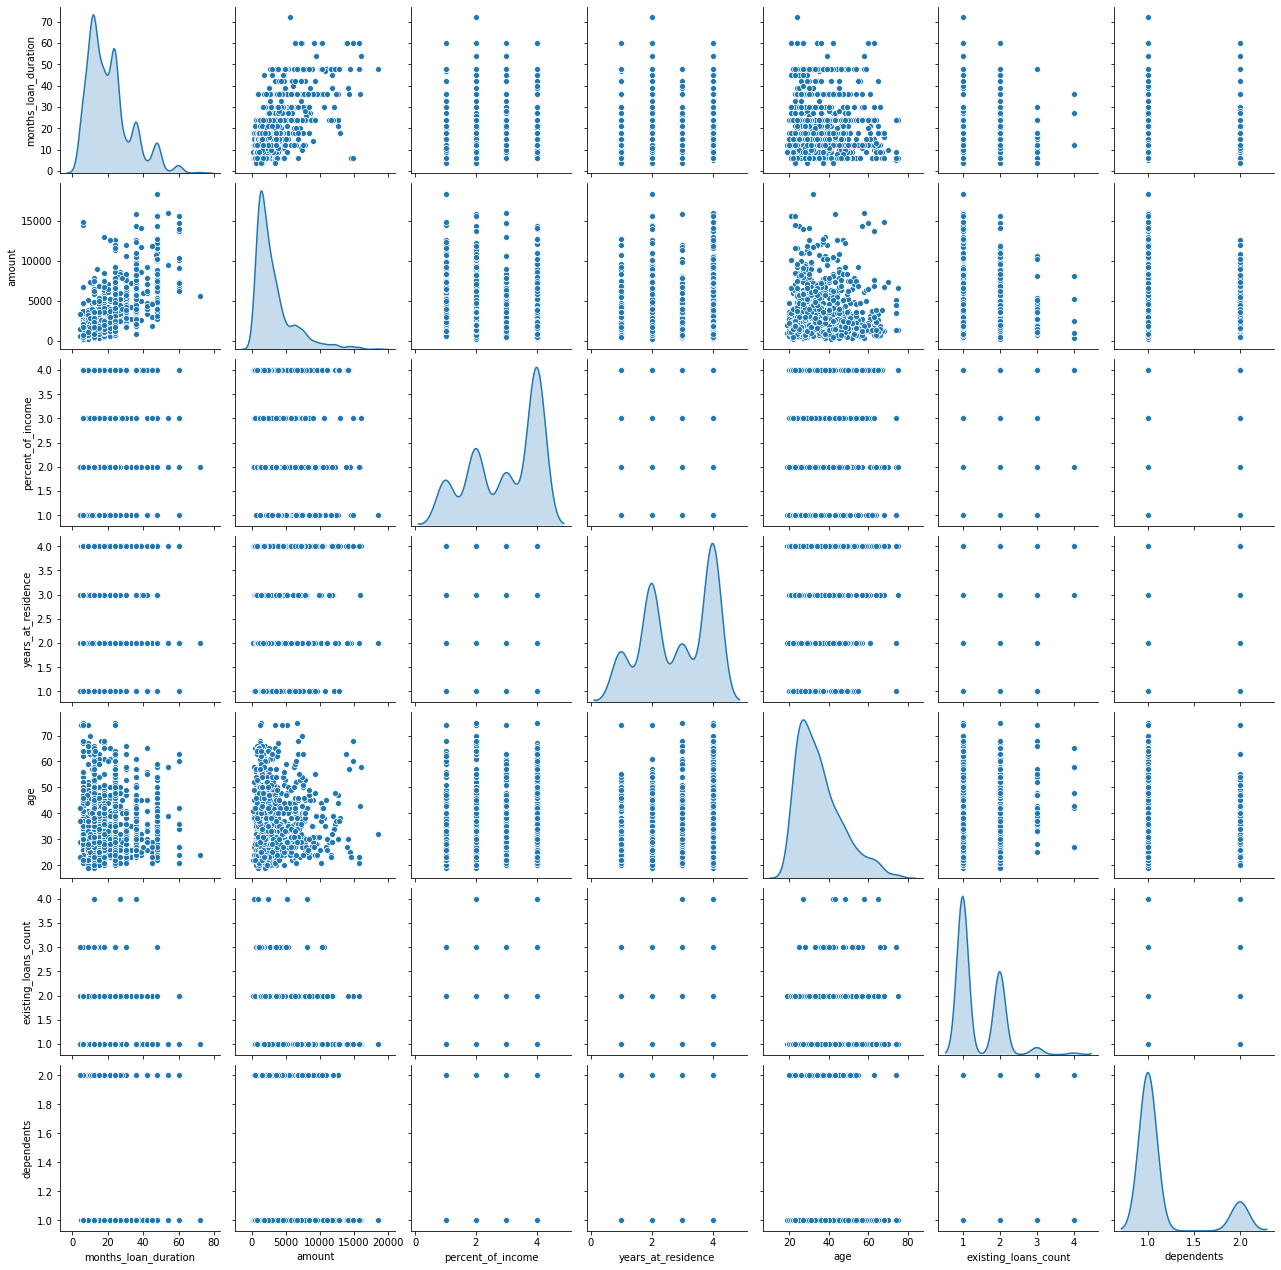

In [20]:
sns.pairplot(credit_df,diag_kind="kde")

In [21]:
credit_df["purpose"].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

Data Cleaning

In [22]:
#Removing Duplicates
credit_df.drop_duplicates()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [23]:
#Removing irrelevant data
#Example if we have home loan data in this dataset, we should remove it
credit_df["purpose"].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [24]:
#Fixing Categorical Column Spelling Issues (Fixing Structural Errors)
for i in categorical_columns:
    print(credit_df[i].value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64
no     700
yes  

In [6]:
credit_df["purpose"] = credit_df["purpose"].replace({"car0":"car"})

In [26]:
credit_df["purpose"].value_counts()

furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: purpose, dtype: int64

In [27]:
#Fixing Outliers
credit_df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [28]:
#Missing Values Imputation
#This dataset does not have any missing values

In [29]:
#Before feature engineering, build the first baseline model
credit_df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [75]:
#For building model, we need only numerical columns and hence categorical columns should be converted to numeric
#Encoding Methods
#Method 1 - Replacing Values to Numeric
credit_df["checking_balance"].replace({"unknown":0,"< 0 DM":1,"1 - 200 DM":2,"> 200 DM":3})

0      1
1      2
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    1
999    2
Name: checking_balance, Length: 1000, dtype: int64

In [31]:
#Method 2 - using encoding function
pd.Categorical(credit_df["checking_balance"]).codes

array([1, 0, 3, 1, 1, 3, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 3, 1, 0, 3, 3, 1,
       1, 0, 3, 1, 3, 2, 0, 1, 0, 1, 0, 3, 2, 0, 3, 2, 2, 0, 3, 0, 0, 1,
       1, 3, 3, 1, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 2, 1, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 1, 0, 1, 1, 1, 0, 3, 0, 3, 3, 3, 1, 1, 3, 0, 0,
       1, 1, 3, 1, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0,
       0, 2, 0, 3, 1, 3, 1, 1, 1, 0, 1, 3, 3, 2, 0, 1, 1, 0, 0, 1, 0, 1,
       3, 3, 3, 3, 3, 0, 0, 2, 2, 0, 1, 1, 3, 0, 1, 3, 1, 3, 3, 3, 2, 0,
       0, 1, 1, 1, 0, 3, 3, 3, 3, 0, 3, 3, 1, 0, 3, 0, 1, 3, 0, 0, 1, 3,
       1, 1, 3, 1, 3, 0, 1, 3, 0, 3, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 3, 1, 3, 1, 3, 1, 3, 0, 1, 3, 3, 3, 1, 2, 3, 0, 1, 2, 1, 3,
       0, 1, 3, 3, 3, 3, 0, 1, 3, 1, 2, 3, 3, 0, 3, 1, 0, 0, 3, 1, 1, 3,
       1, 3, 3, 3, 3, 3, 2, 3, 1, 2, 0, 3, 0, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       3, 0, 3, 3, 1, 3, 3, 3, 0, 0, 1, 3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 1,
       1, 0, 0, 1, 3, 0, 1, 2, 3, 0, 3, 3, 3, 0, 3,

In [32]:
#Method 3 - Onehot encoding
credit_df["checking_balance"].value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [33]:
pd.get_dummies(credit_df["purpose"])

,business,car,education,furniture/appliances,renovations
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
995,0,0,0,1,0
996,0,1,0,0,0
997,0,0,0,1,0
998,0,0,0,1,0


In [34]:
credit_df["checking_balance"]

0          < 0 DM
1      1 - 200 DM
2         unknown
3          < 0 DM
4          < 0 DM
          ...    
995       unknown
996        < 0 DM
997       unknown
998        < 0 DM
999    1 - 200 DM
Name: checking_balance, Length: 1000, dtype: object

In [35]:
#import category_encoders 
#CountEncoders, TargetEncoder

In [7]:
for i in categorical_columns:
    credit_df[i] = pd.Categorical(credit_df[i]).codes

In [37]:
credit_df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,3,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,3,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,2,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,3,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,1,3,1736,2,1,3,4,31,1,1,1,3,1,0,0
996,1,30,1,1,3857,2,0,4,4,40,1,1,1,0,1,1,0
997,3,12,1,3,804,2,3,4,4,38,1,1,1,1,1,0,0
998,1,45,1,3,1845,2,0,4,4,23,1,0,1,1,1,1,1


In [38]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [39]:
X = credit_df.drop("default",axis=1)
y = credit_df["default"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [41]:
clf = GaussianNB()

In [42]:
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
clf.score(X_test,y_test)

0.75

In [44]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred),sep="\n")

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       214
           1       0.58      0.44      0.50        86

   micro avg       0.75      0.75      0.75       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



In [45]:
#Feature Engineering
#1. Creating Interacting Features
#Sales - Qty, Unit Price => total amount = Qty*Unit Price

#2. Remove Unused Columns -- Feature Selection
#Remove ID or unique identifier columns
#Try understanding important features and remove the others

In [47]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
pd.DataFrame(dt_clf.feature_importances_,index=list(X_train.columns),columns=["Imp"]).sort_values(by="Imp",ascending=False)

,Imp
amount,0.171388
checking_balance,0.144008
age,0.124172
months_loan_duration,0.089967
savings_balance,0.078644
employment_duration,0.071678
credit_history,0.069203
purpose,0.055831
years_at_residence,0.047933
percent_of_income,0.042589


In [79]:
X = credit_df.drop(["default","job","dependents","phone","existing_loans_count","other_credit","housing"],axis=1)
y = credit_df["default"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)
clf1 = GaussianNB()
clf1.fit(X_train,y_train)
print(clf1.score(X_test,y_test))
print(clf1.score(X_train,y_train))

0.7533333333333333
0.73


In [68]:
#3. Combine Spare Classes
for i in categorical_columns:
    print(credit_df[i].value_counts())

3    394
1    274
0    269
2     63
Name: checking_balance, dtype: int64
1    530
0    293
3     88
4     49
2     40
Name: credit_history, dtype: int64
3    473
1    349
0     97
2     59
4     22
Name: purpose, dtype: int64
2    603
4    183
0    103
1     63
3     48
Name: savings_balance, dtype: int64
0    339
3    253
1    174
2    172
4     62
Name: employment_duration, dtype: int64
1    814
0    139
2     47
Name: other_credit, dtype: int64
1    713
2    179
0    108
Name: housing, dtype: int64
1    630
3    200
0    148
2     22
Name: job, dtype: int64
0    596
1    404
Name: phone, dtype: int64
0    700
1    300
Name: default, dtype: int64


In [71]:
#credit_df["purpose"].replace({4:3},inplace=True)

X = credit_df.drop(["default","job","dependents","phone","existing_loans_count","other_credit","housing"],axis=1)
y = credit_df["default"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)
clf1 = GaussianNB()
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

In [78]:
#4. Binning
#Country Name - Region Name Eg (India - ASIA; China - ASIA; Germany - EUROPE)
#Location Name - Country
#Product Name - Product Category --> Sub Category Type --> Category Type
#Container Number - Container Type
#Employee ID - Designation, Grade, Level
#Customer Name - Customer Type

In [ ]:
#5. Grouping Dataset - Summarization/Aggretation
#This step is usually acheived in DB layer --> or it will be done in Data Engineering

In [ ]:
#6. Scaling
Normalization - MinMaxScaler = x - xmin / xmax-xmin
Standardization - zscore = x - mu/std

In [87]:
credit_df_copy = credit_df_copy.apply(zscore)

for i in credit_df_copy.columns:
    print(i, credit_df_copy.loc[credit_df_copy[i] > 3][i].count())

In [112]:
credit_df_copy = credit_df.copy(deep=True)
obj_minmax = MinMaxScaler()
credit_df_copy = obj_minmax.fit_transform(credit_df_copy)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [118]:
credit_df_copy = pd.DataFrame(credit_df_copy,columns=credit_df.columns)

In [119]:
X = credit_df_copy.drop(["default","job","dependents","phone","existing_loans_count","other_credit","housing"],axis=1)
y = credit_df_copy["default"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)
clf1 = GaussianNB()
clf1.fit(X_train,y_train)
print(clf1.score(X_test,y_test))
print(clf1.score(X_train,y_train))

0.75
0.7314285714285714


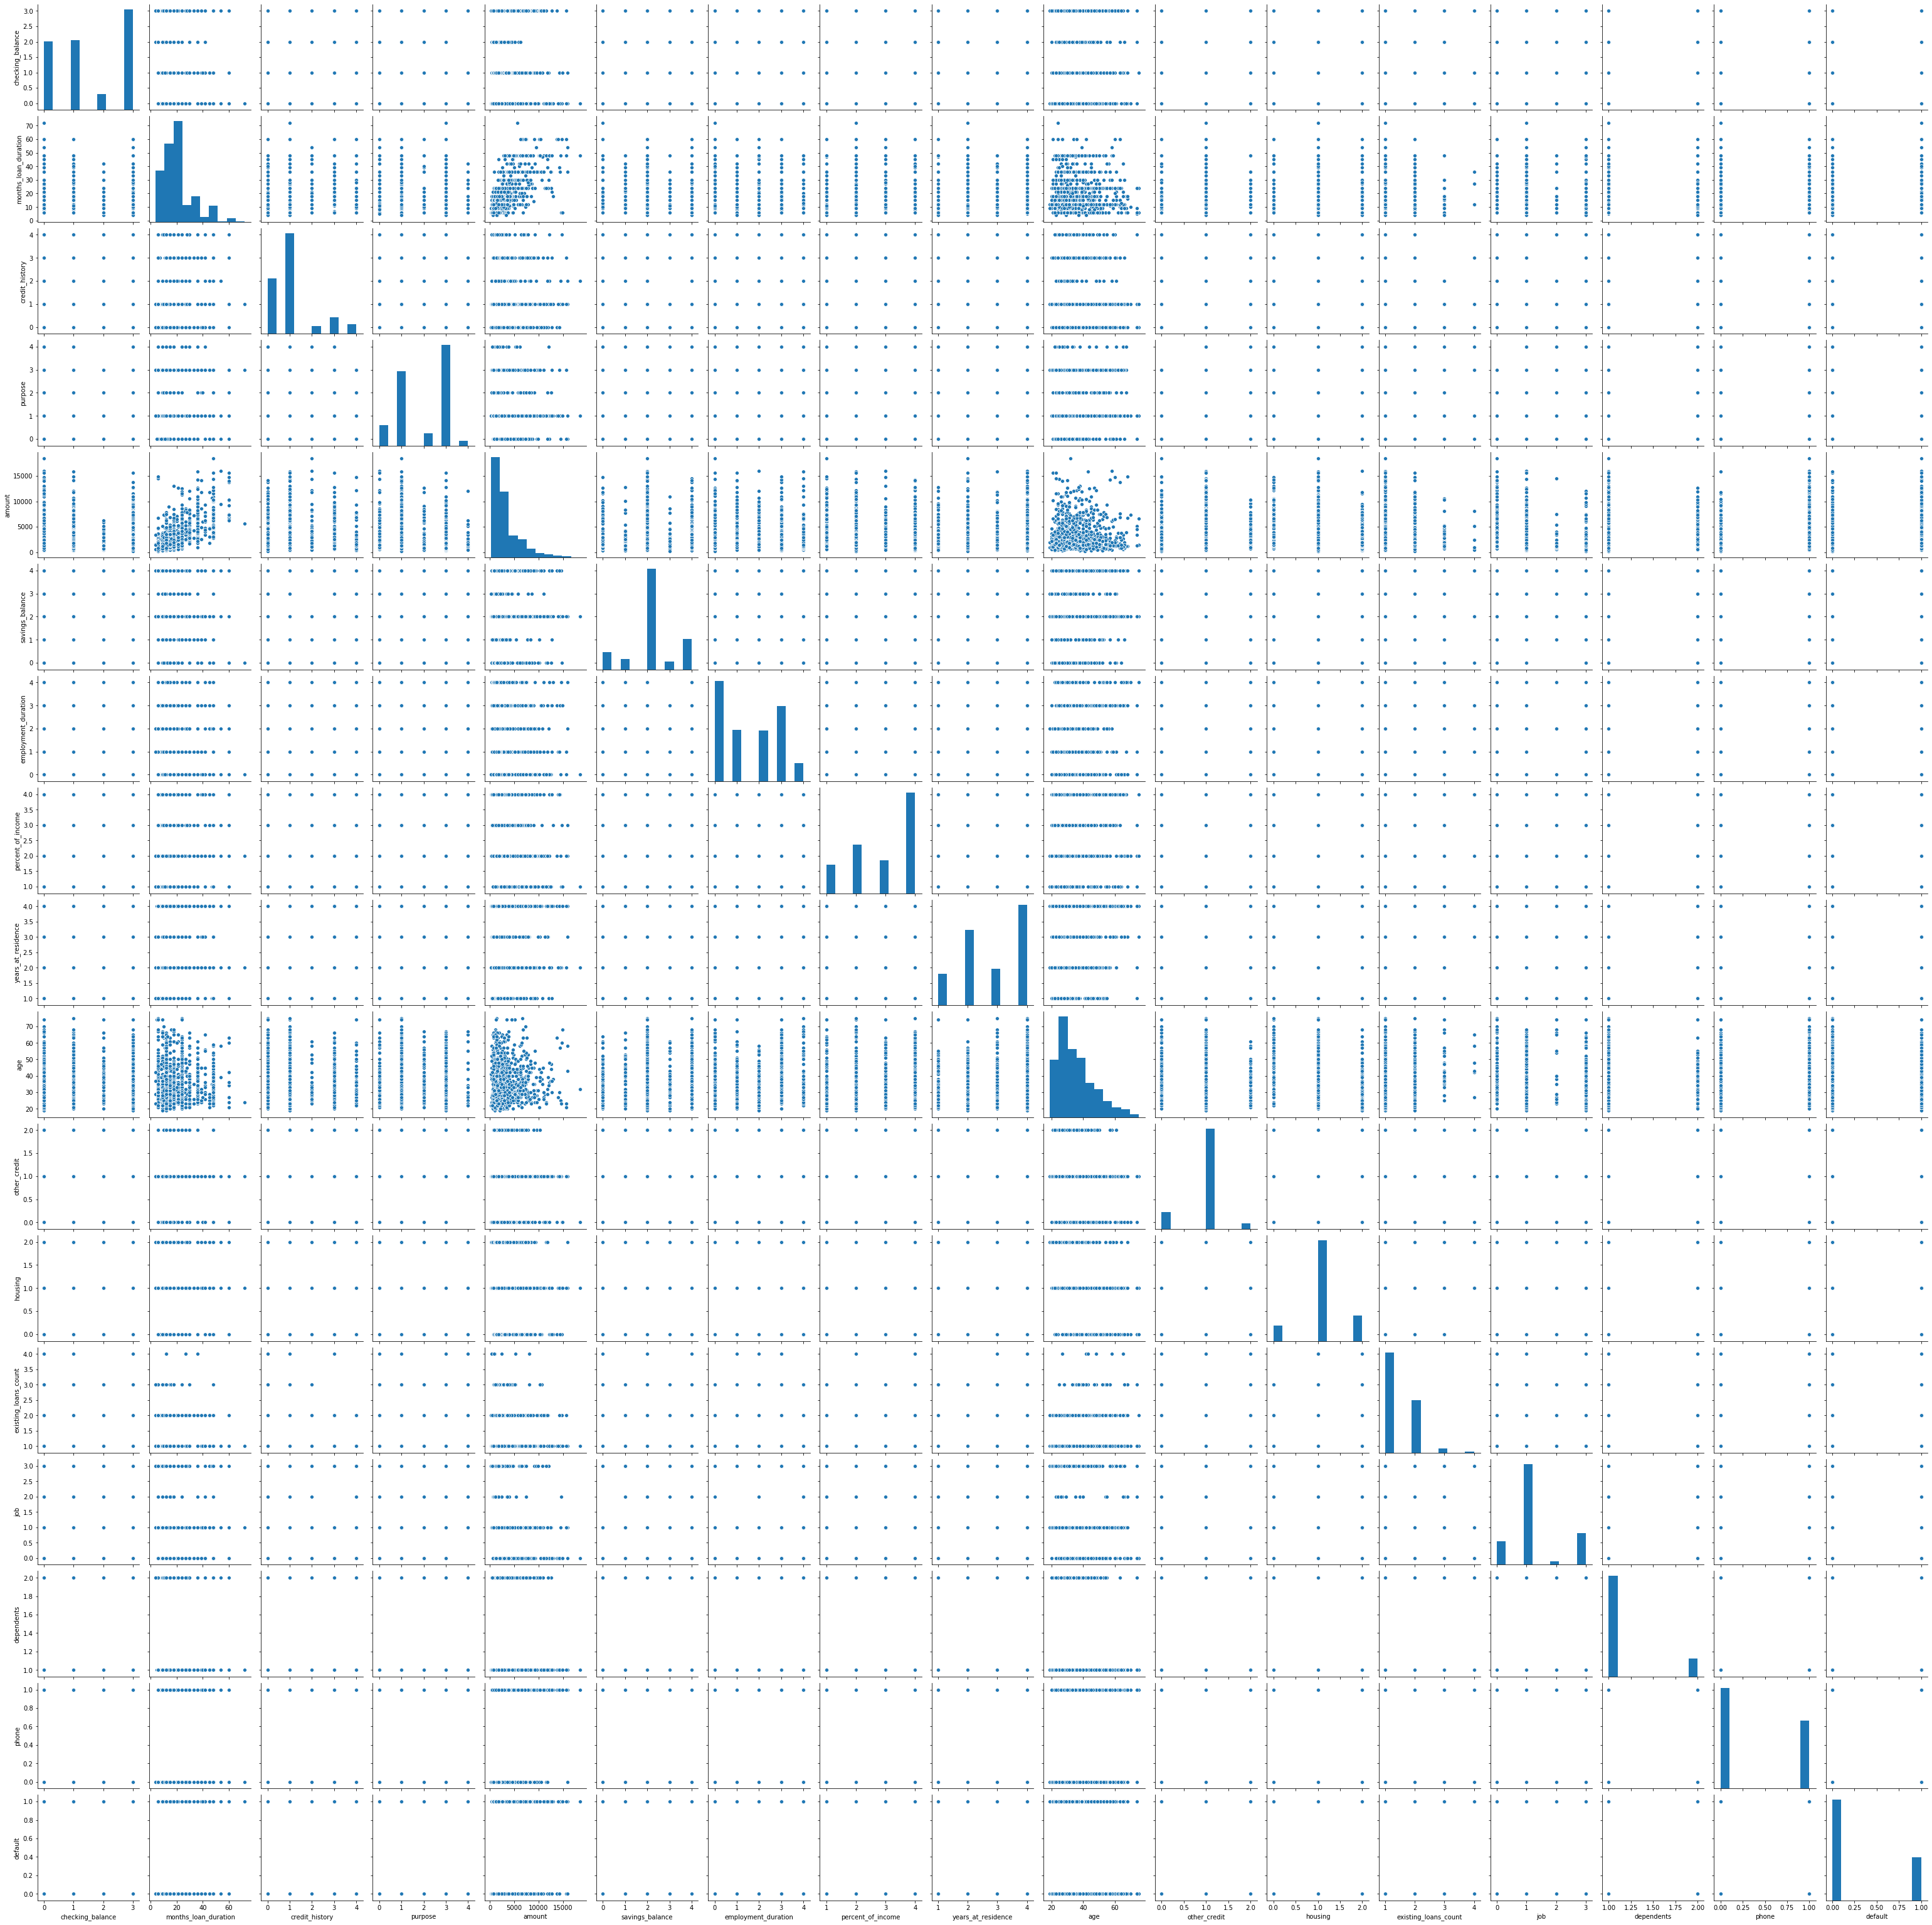

In [122]:
sns.pairplot(credit_df)

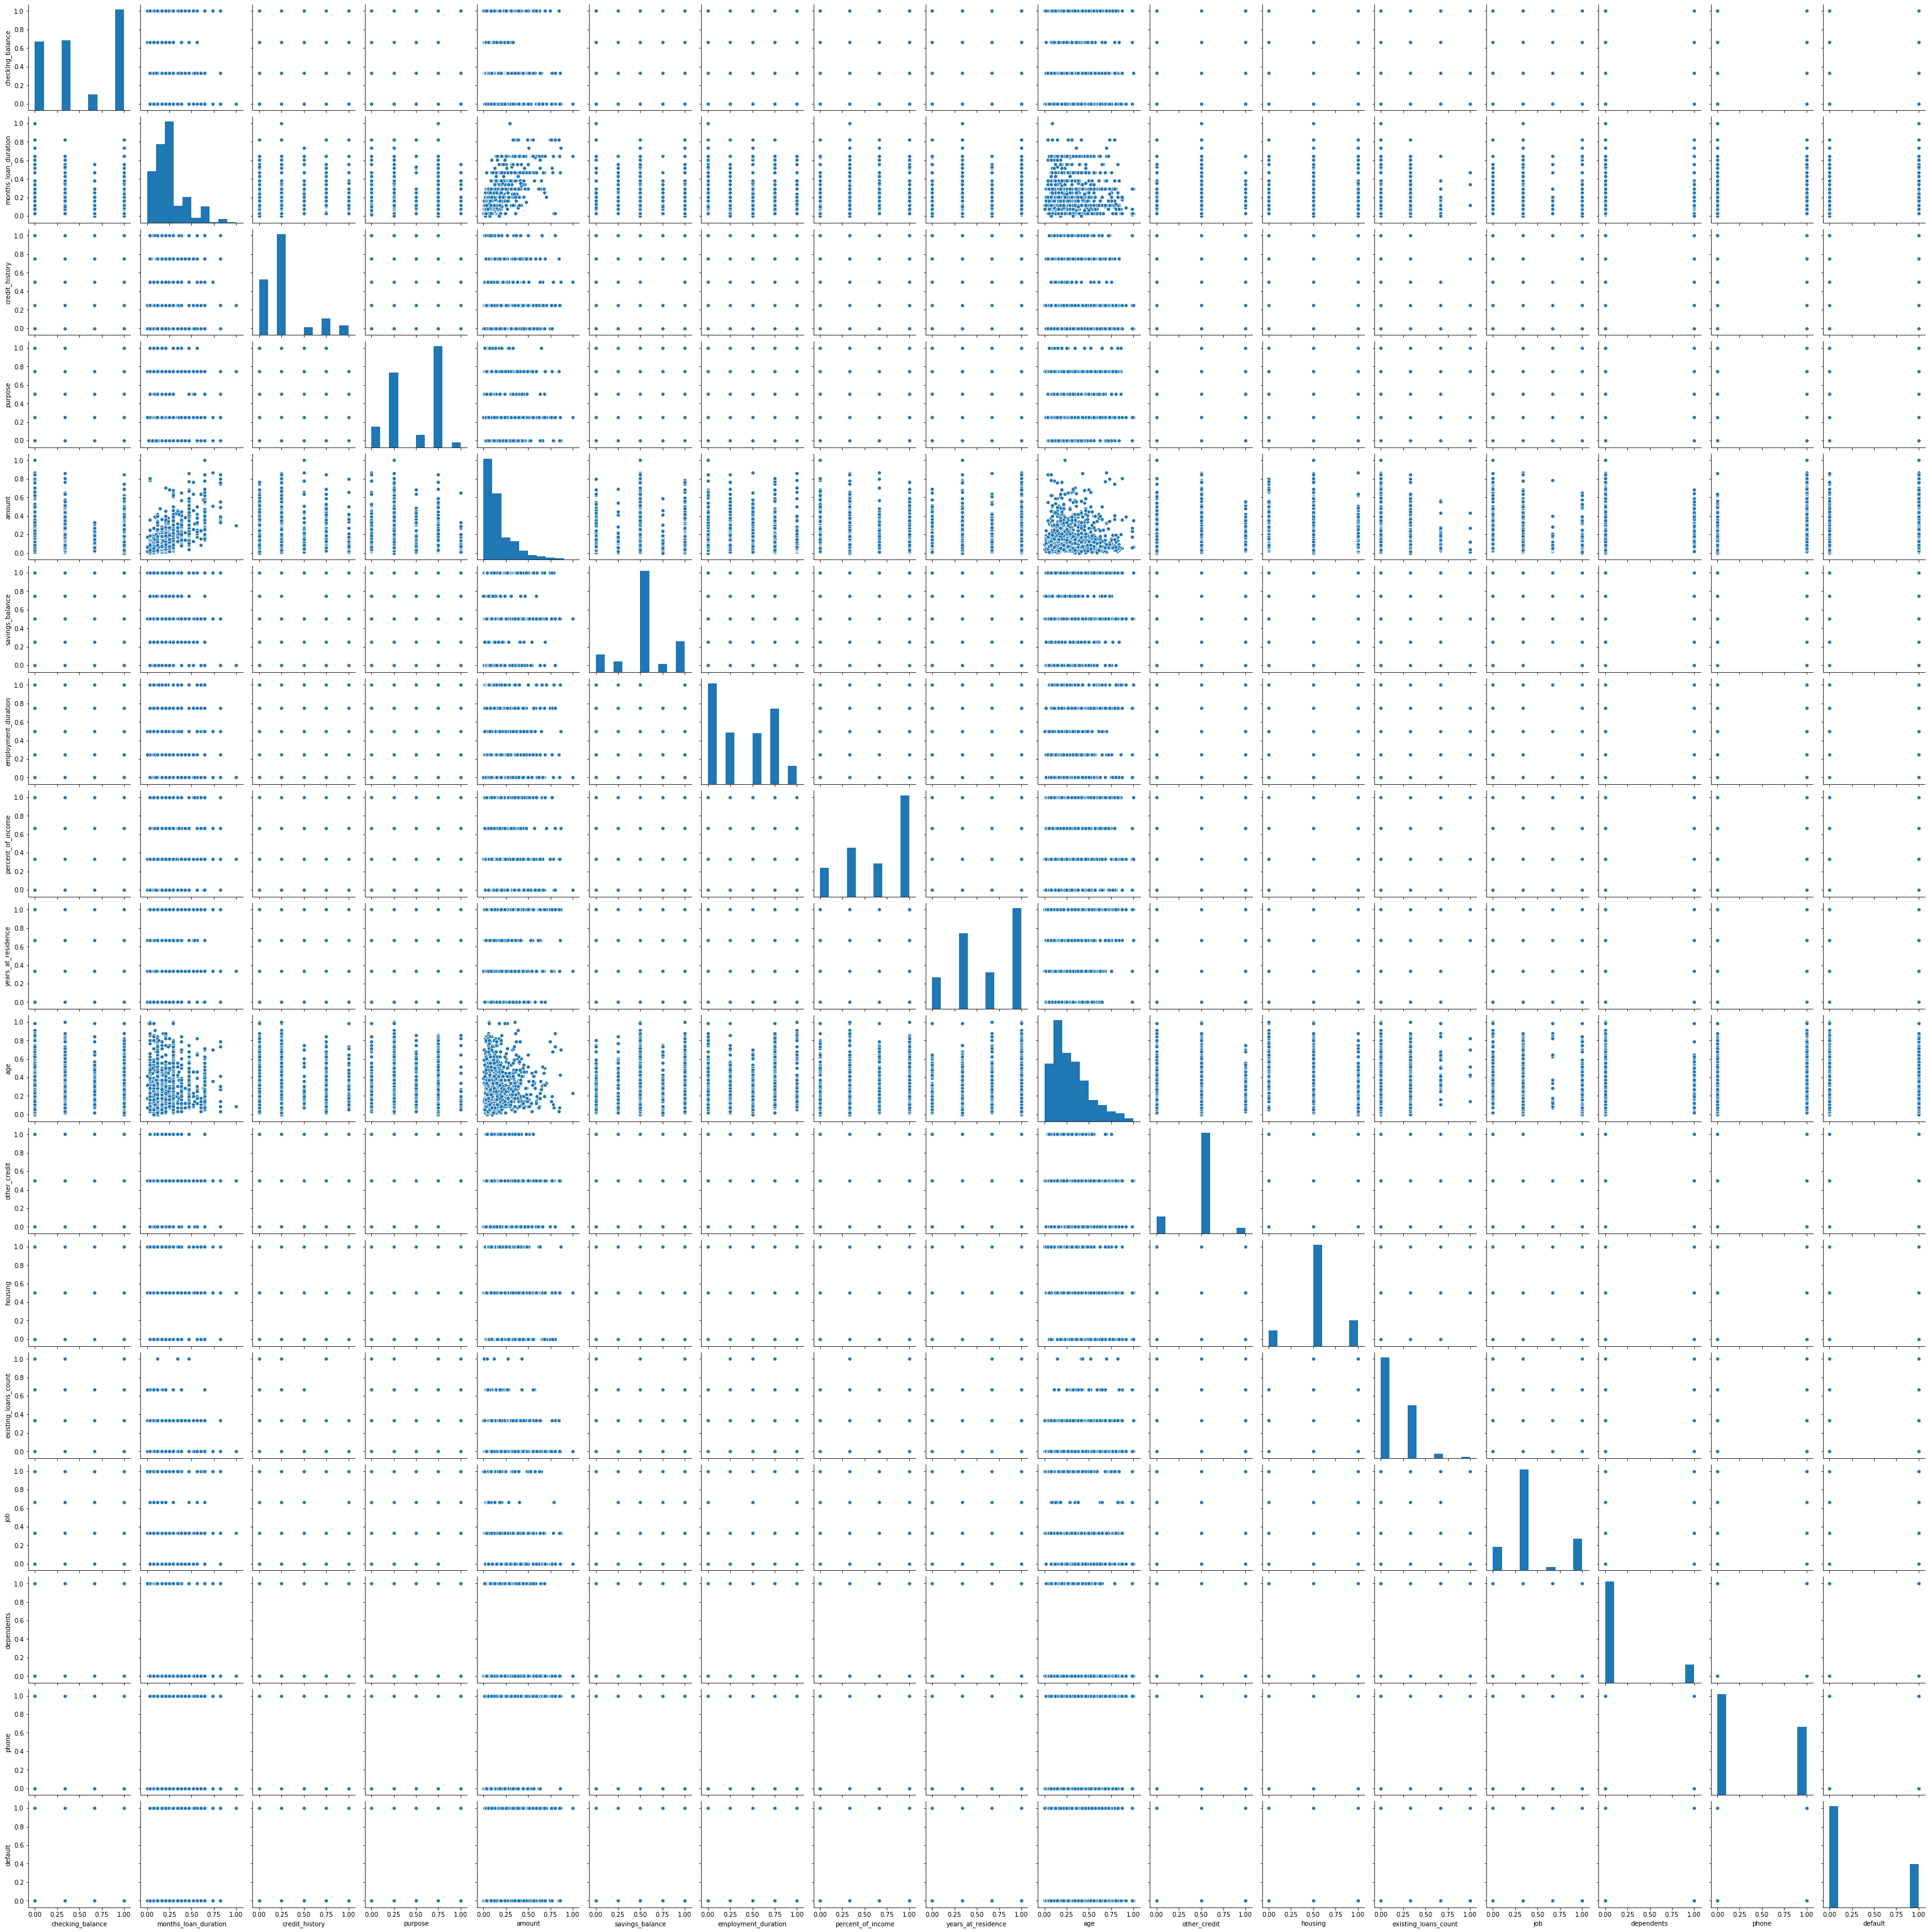

In [123]:
sns.pairplot(credit_df_copy)

In [124]:
#Categorical to Numerical Encoding

In [ ]:
#Feature Splitting
#Example - Purchase Order Dataset --> IBNJBJJ456445644|1
Feature 1--> Order Number
Feature 2--> Line Number 

In [14]:
#Model Tuning with Hypertuning parameters
X = credit_df.drop(["default","job","dependents","phone","existing_loans_count","other_credit","housing"],axis=1)
y = credit_df["default"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)
clf1 = GaussianNB(var_smoothing=2e-09)
clf1.fit(X_train,y_train)
print(clf1.score(X_test,y_test))
print(clf1.score(X_train,y_train))

0.7533333333333333
0.7285714285714285


param_dist = {"var_smoothing":[]}
rs = RandomizedSearchCV(estimator=GaussianNB(),param_distributions=param_dist,cv=4,n_iter=100)

In [41]:
#Performing KFold CV
kfold_obj = KFold(10,shuffle=True)
scores = []
for train,test in kfold_obj.split(credit_df):
    X_train = credit_df.iloc[train].drop(["default","job","dependents","phone","existing_loans_count","other_credit","housing"],axis=1)
    y_train = credit_df.iloc[train]["default"]
    X_test = credit_df.iloc[test].drop(["default","job","dependents","phone","existing_loans_count","other_credit","housing"],axis=1)
    y_test = credit_df.iloc[test]["default"]
    clf1 = GaussianNB()
    clf1.fit(X_train,y_train)
    score = clf1.score(X_test,y_test)
    scores.append(score)

In [42]:
scores

[0.68, 0.7, 0.69, 0.8, 0.72, 0.74, 0.74, 0.81, 0.69, 0.73]

In [43]:
np.array(scores).mean()

0.7300000000000001

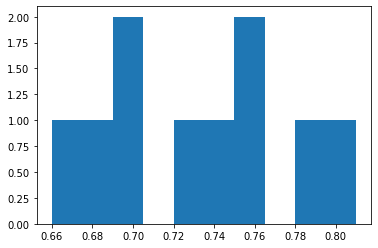

In [34]:
plt.hist(scores)
plt.show()

In [59]:
# confidence intervals
alpha=0.95 #95% confidence level
p = ((1.0-alpha)/2.0) * 100 # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print("With %.1f%% confidence, interval is %.1f%% and %.1f%%" % (alpha*100,lower*100,upper*100))

With 95.0% confidence, interval is 68.2% and 80.8%
